Regression model? Regression is a statistical method used to determine the relationship between a dependent variable and one or more independent variables. In a regression model, the goal is to find a functional relationship between the independent variables and the dependent variable. This functional relationship is used to predict the value of the dependent variable for new values of the independent variables.

In [11]:
# global imports and configuration
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


#ta bort nedanstående rad senare
# set plot style
sns.set_style("darkgrid")

In [40]:
df = pd.read_csv('data_assignment2.csv')

finalData = df.dropna()

df.head(5)

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000


**A. Find a linear regression model that relates the living area to the selling price.**

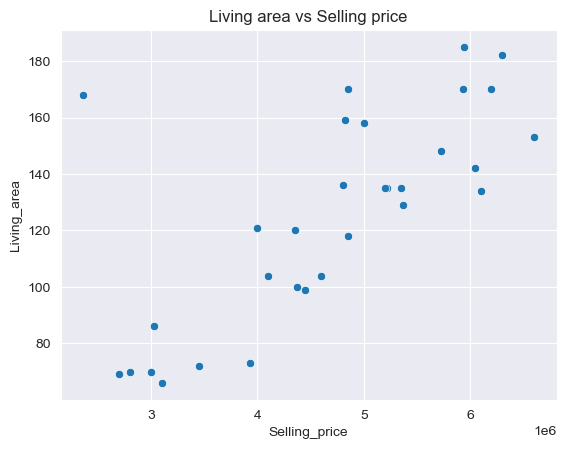

In [27]:
#Plot the data before finding linear regression model 
sns.scatterplot(x='Selling_price', y='Living_area', data=df)
plt.title('Living area vs Selling price')
plt.show()

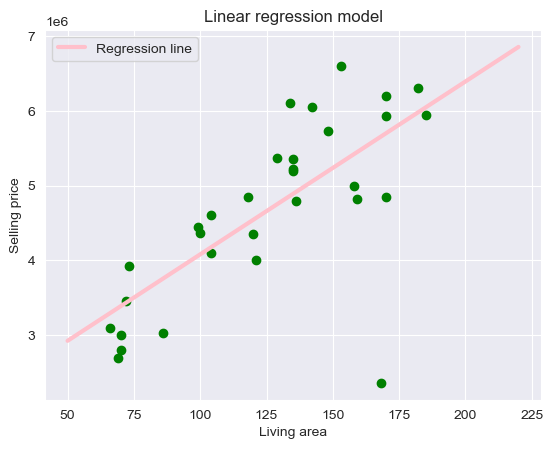

In [37]:
# Remove any rows where either Living area or Selling price are NaN, as they only provide useful insight together.
cleaned_df = df.dropna(subset=['Living_area', 'Selling_price'])

# Select Living area as the feature for the X axis, and Selling price as the feature for the Y axis
x = cleaned_df['Living_area'].values.reshape(-1, 1)
y = cleaned_df['Selling_price'].values.reshape(-1, 1)

# Create a linear regression model and fit it to the data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

# Define the x values to be used for the regression line
x_line = np.array([[50], [220]])

# Predict the corresponding y values for the regression line
y_line = model.predict(x_line)

# Create a scatter plot of the data points and plot the regression line on top of it
plt.scatter(x, y, color='green')
plt.plot(x_line, y_line, color='pink', linewidth=3, label='Regression line')

# Set the axis labels and title
plt.xlabel('Living area')
plt.ylabel('Selling price')
plt.title('Linear regression model')

# Add a legend and display the plot
plt.legend()
plt.show()

**B. What are the values of the slope and intercept of the regression line?**

In [42]:
#Change the code below 
# Create a linear regression model that fits on the 'Living area (m2)' and 'Price (kr)' data.
LRmodel = LinearRegression().fit(finalData[['Living_area']], finalData['Selling_price'])

# Slope value
slope = LRmodel.coef_

# Intercept value
intercept = LRmodel.intercept_

#Print slope and intercept value
print('Slope: %f \nIntercept: %f \n' %(slope, intercept))

Slope: 23125.566917 
Intercept: 1767086.283658 



**C. Use this model to predict the selling prices of houses which have living area $10 m^{2}$, $100 m^{2}$, $150 m^{2}$, $200 m^{2}$ and $1000 m^{2}$.** 

In [43]:
# Create a dictonary with the living areas
livingAreaDict = {'Living_area': [10, 100, 150, 200, 1000]}

# Create a dataframe of the dictonary
livingArea = pd.DataFrame(livingAreaDict)

# Create 'Price (kr)' column based on the regression line
livingArea['Selling_price'] = slope*livingArea['Living_area'] + intercept

# Display livingArea dataframe
print('Figure 2: dataframe with predicted selling price (kr) as a function of the living area (m2)')
display(livingArea)

Figure 2: dataframe with predicted selling price (kr) as a function of the living area (m2)


,Living_area,Selling_price
0,10,1.998342e+06
1,100,4.079643e+06
2,150,5.235921e+06
3,200,6.392200e+06
4,1000,2.489265e+07


Figure 3: 


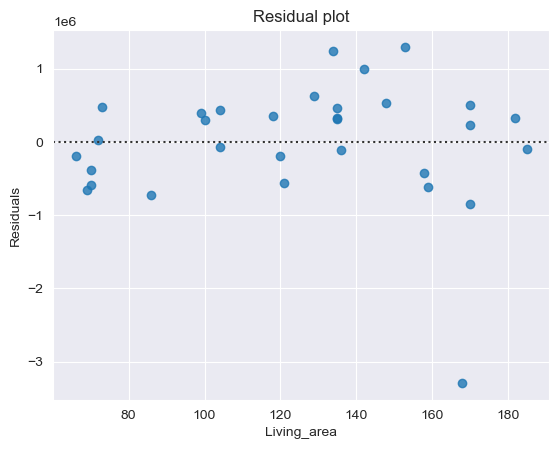

In [44]:
#Change the code below 
#Create residual plot using Seaborn
sns.residplot(data = finalData ,x = 'Living_area', y = 'Selling_price').set(title='Residual plot')

# Change y label
plt.ylabel('Residuals')

# Print figure number
print('Figure 3: ')

# Display the plot
plt.show()

**E.Is this a useful model? Are there any limitations? What could you do to
improve the models ability to predict selling prices? Can this model be used in
other areas than Landvetter?.**